<a href="https://colab.research.google.com/github/sultana4/Breast-Cancer-Prediction-Using-machine-Learning/blob/main/Breast_Cancer_Prediction_Using_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install -q gdown && gdown --fuzzy https://drive.google.com/file/d/14dYtrLvDMh0ZsGA6FO6Rd9ONxCOY3cm4/view

Downloading...
From: https://drive.google.com/uc?id=14dYtrLvDMh0ZsGA6FO6Rd9ONxCOY3cm4
To: /content/data.csv
100% 125k/125k [00:00<00:00, 5.11MB/s]


In [ ]:
data_frame= pd.read_csv("/content/data.csv")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install -q gdown && gdown --fuzzy https://drive.google.com/file/d/14dYtrLvDMh0ZsGA6FO6Rd9ONxCOY3cm4/view

Downloading...
From: https://drive.google.com/uc?id=14dYtrLvDMh0ZsGA6FO6Rd9ONxCOY3cm4
To: /content/data.csv
100% 125k/125k [00:00<00:00, 3.02MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_frame.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [ ]:
data_frame.shape

(569, 33)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

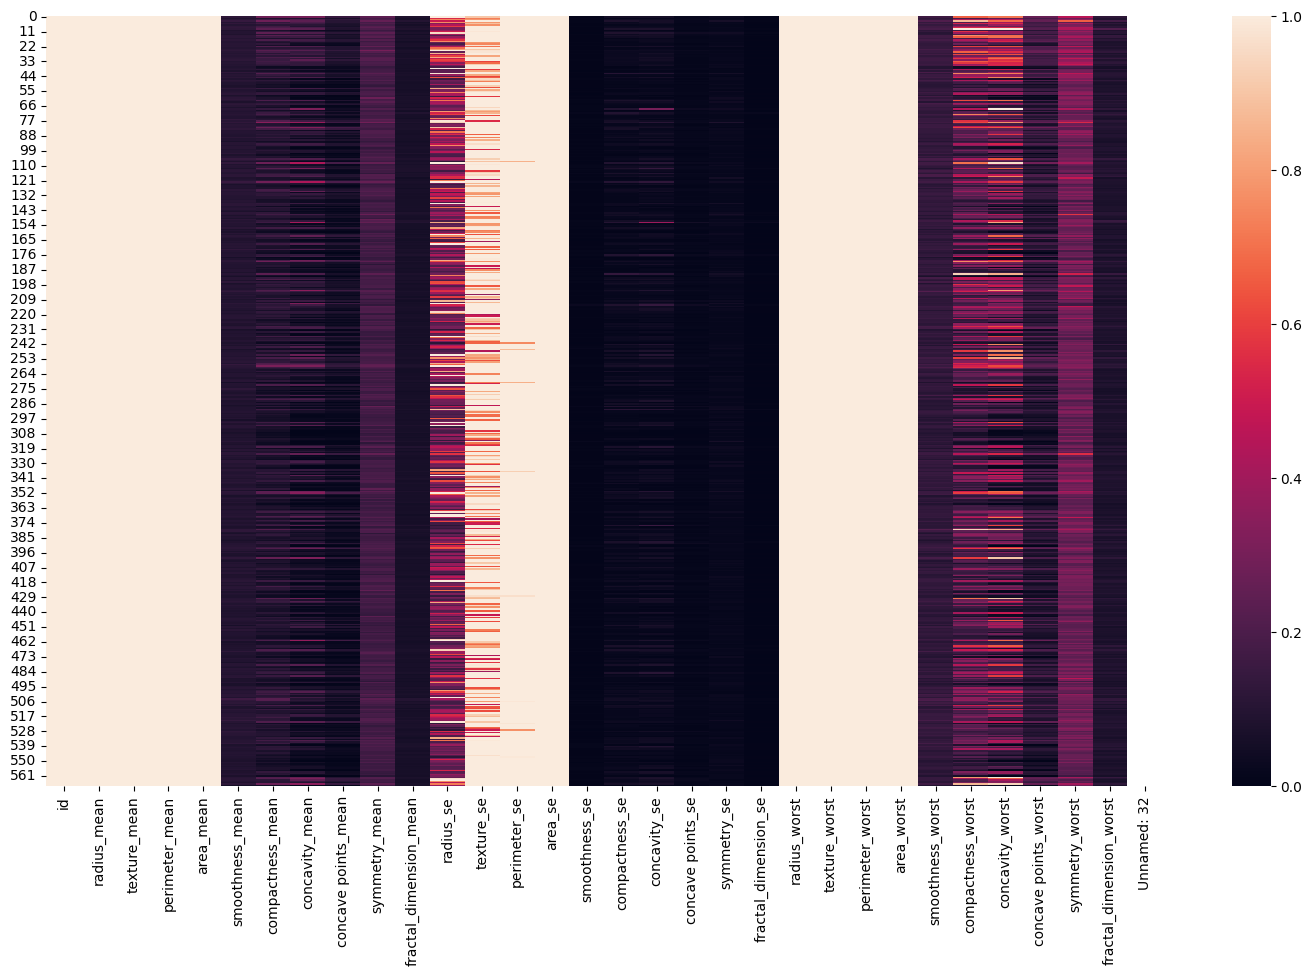

In [ ]:
plt.figure(figsize=(18,10))
df=data_frame.drop(['diagnosis'], axis=1)
sns.heatmap(df, vmin=0, vmax=1)

In [ ]:
data_frame.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data_frame.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data_frame['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
X = data_frame.drop(['diagnosis','Unnamed: 32'], axis=1)
Y = data_frame['diagnosis']

In [ ]:
print(X)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [ ]:
print(Y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 31) (455, 31) (114, 31)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)*100

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)*100

In [ ]:
print('\n\n\tAccuracy on test data = ', test_data_accuracy)



	Accuracy on test data =  60.526315789473685


In [ ]:
input_data = (13.54,14,87.46,566.3,0,0.08129,0,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

['B']
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (842302,   17.99   ,10.38, 122.8   ,1001,  0.1184, 0.2776, 0.1471, 0.2419, 0.07871 ,1.095, 0.9053, 8.589   ,153.4  ,0.006399,  0.04904,    0.05373,    0.01587,    0.03003,    0.006193    ,25.38  ,17.33  ,184.6, 2019,   0.1622, 0.6656  ,0.7119,    0.2654, 0.4601, 0.1189,0.1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)

tree.fit(X_train,Y_train)

predict=tree.predict(X_test)

forma2 = metrics.accuracy_score(predict,Y_test)*100

print('\n\n\tThe accuracy of the Decision Tree is',"{:.2f} %".format(forma2))

prediction = tree.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('\n\tThe Breast Cancer is Benign')





	The accuracy of the Decision Tree is 91.23 %
['M']

	The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           B       0.97      0.88      0.92        69
           M       0.84      0.96      0.90        45

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
input_data =(84358402   ,   14.34   ,135.1  ,1297   ,0.1003 ,0.1328 ,0.198  ,0.1043,    0.1809, 0.05883 ,0.7572,    0.7813  ,5.438, 94.44   ,0.01149    ,0.02461    ,0.05688    ,0.01885    ,0.01756    ,0.005115   ,22.54  ,16.67, 152.2,  1575,   0.1374, 0.205   ,0.4    ,0.1625,    0.2364, 0.07678,0.1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

gauss_pred = GaussianNB()
Y_pred = gauss_pred.fit(X_train, Y_train).predict(X_test)
forma3 = metrics.accuracy_score(Y_pred,Y_test)*100


print('\n\n\n\tThe accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.2f} %".format(forma3))
prediction = tree.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('\n\tThe Breast Cancer is Benign')




	The accuracy of the Guassian Naive Bayes Classifier on test data is 60.53 %
['M']

	The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           B       0.61      0.99      0.75        69
           M       0.50      0.02      0.04        45

    accuracy                           0.61       114
   macro avg       0.55      0.50      0.40       114
weighted avg       0.56      0.61      0.47       114



In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

# Assuming you have X_train, Y_train, X_test, and Y_test defined

poly_svc = SVC(kernel='poly', degree=3).fit(X_train, Y_train)
predict = poly_svc.predict(X_test)
accuracy = metrics.accuracy_score(predict, Y_test) * 100

print('\n\n\tThe accuracy of the Polynomial SVC is', "{:.3f} %".format(accuracy))





	The accuracy of the Polynomial SVC is 60.526 %


In [ ]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           B       0.61      1.00      0.75        69
           M       0.00      0.00      0.00        45

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,Y_train)

prediction=knn.predict(X_test)

forma5 = metrics.accuracy_score(prediction,Y_test)*100




print('\n\n\tThe accuracy of the KNN Classifier is',"{:.2f} %".format(forma5))
prediction = tree.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('\n\tThe Breast Cancer is Benign\n')



	The accuracy of the KNN Classifier is 68.42 %
['M']

	The Breast Cancer is Benign



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(




	1 Means Benign
	0 Means Malignant 


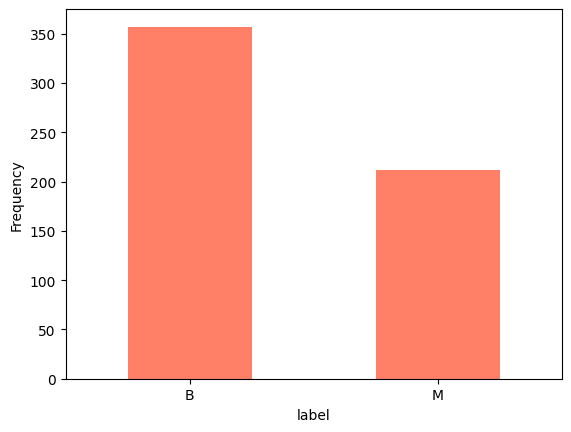

In [ ]:
count_classes = pd.value_counts(data_frame['diagnosis'], sort = True)

count_classes.plot(kind = 'bar', rot=0, color="#FF8066")

plt.xticks(range(2))

plt.xlabel("label")

plt.ylabel("Frequency")
print("\n\n\t1 Means Benign\n\t0 Means Malignant ")

In [ ]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train,Y_train)

predict_d=clf.predict(X_test)

forma6 = metrics.accuracy_score(predict_d,Y_test)*100
print('\n\n\tThe accuracy of the SVM is',"{:.2f} %".format(forma6))

In [ ]:
X = ['Logistic','Tree','SVC','GaussianNB','KNN','SVM']
Y = (test_data_accuracy , forma2,forma4 ,forma3,forma5,forma6)
plt.bar(X,Y)
plt.xlabel('Total accurecy of Algorithm')
plt.ylabel("Frequency")
plt.title('Categories Bar Plot')
plt.show()

In [ ]:
data_frame_temp = data_frame.drop(columns=['label'], axis=1)

In [ ]:
Y = (test_data_accuracy , forma2,forma4,forma3,forma5,forma6)